In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

**1. Download the dataset: Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


**2. Load the dataset into the tool.**

In [3]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**3. Perform Below Visualizations.**

**∙ Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


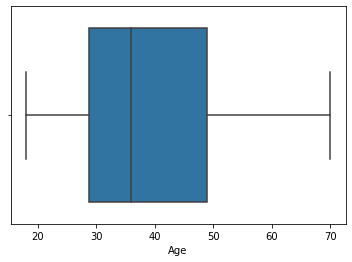

In [5]:
sns.boxplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


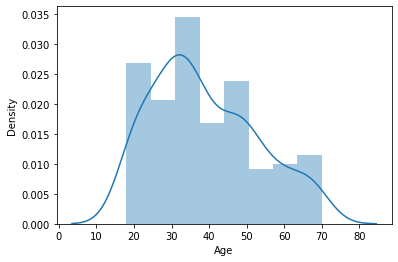

In [6]:
sns.distplot(data['Age'])

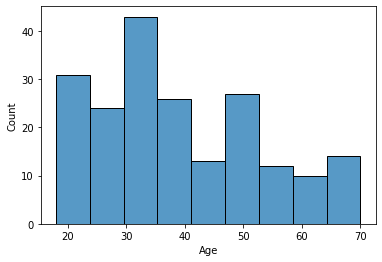

In [7]:
sns.histplot(data['Age'])

**Bi-Variate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


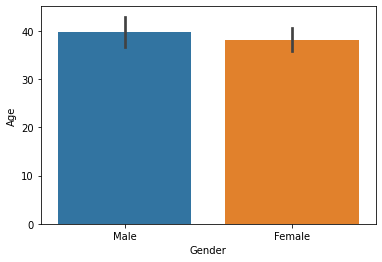

In [8]:
sns.barplot(data['Gender'],data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


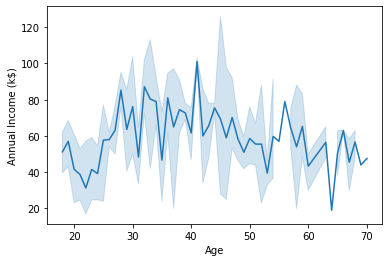

In [9]:
sns.lineplot(data['Age'],data['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


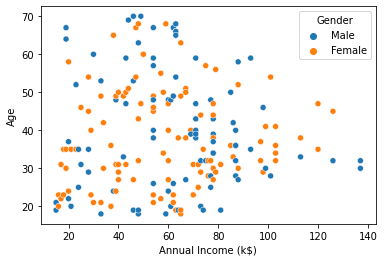

In [10]:
sns.scatterplot(data['Annual Income (k$)'],data['Age'],hue =data['Gender'])

**Multi-Variate Analysis**

In [11]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


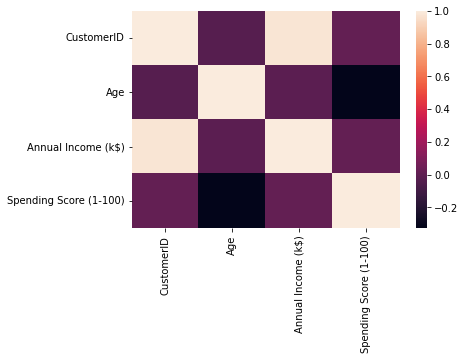

In [12]:
sns.heatmap(data.corr())

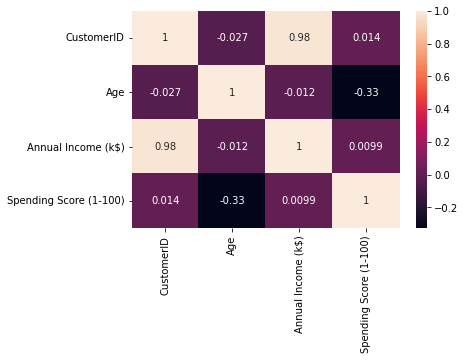

In [13]:
sns.heatmap(data.corr(),annot=True)

**4.Perform descriptive statistics on the dataset**

In [14]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**5.Check for Missing values and deal with them**

In [16]:
data.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

**6.Find the outliers and replace them outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


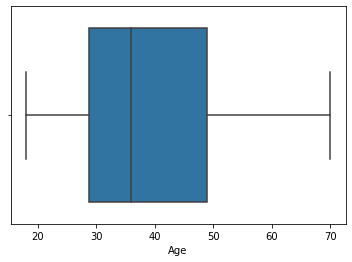

In [17]:
sns.boxplot(data['Age'])

**7.Check for Categorical columns and perform encoding**

In [18]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()
data['Gender'] = l_en.fit_transform(data['Gender'])
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


**8.Scaling the data**

In [19]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler() # between 0 and 1
data_scaled=mm.fit_transform(data)
data_scaled

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

**9. Perform any of the clustering algorithms**

In [20]:
from sklearn.cluster import KMeans
km = KMeans()
clus = km.fit_predict(data_scaled)
clus

array([2, 2, 7, 1, 7, 1, 7, 1, 0, 1, 0, 1, 3, 1, 5, 2, 7, 2, 0, 1, 2, 2,
       3, 2, 3, 2, 3, 2, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 7, 1, 3, 2, 0, 7,
       3, 7, 3, 7, 7, 7, 3, 2, 7, 0, 3, 0, 3, 0, 7, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 7, 0, 3, 3, 3, 0, 2, 3, 2, 7, 3, 0, 2, 0, 3, 7, 0, 3, 7,
       1, 3, 3, 2, 0, 3, 7, 2, 3, 7, 0, 2, 7, 3, 0, 2, 0, 7, 3, 0, 0, 0,
       0, 7, 7, 2, 7, 7, 3, 3, 3, 3, 2, 7, 1, 6, 7, 1, 5, 6, 0, 6, 5, 6,
       7, 1, 5, 1, 4, 6, 5, 1, 4, 6, 7, 1, 5, 6, 0, 1, 4, 6, 5, 6, 4, 1,
       4, 1, 5, 1, 5, 1, 3, 1, 5, 1, 0, 1, 5, 1, 4, 6, 5, 6, 5, 6, 4, 1,
       0, 6, 0, 6, 4, 1, 5, 1, 4, 6, 4, 6, 4, 1, 4, 1, 5, 1, 4, 1, 4, 6,
       5, 6], dtype=int32)

In [21]:
names = data.columns
names

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [22]:
data1= pd.DataFrame(data_scaled,columns = names)
data1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.0,0.326923,0.860656,0.795918
196,0.0,0.519231,0.909836,0.275510
197,1.0,0.269231,0.909836,0.744898
198,1.0,0.269231,1.000000,0.173469


**10. Add the cluster data with the primary dataset**

In [23]:
data1['kclus']  = pd.Series(clus)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,2
1,1.0,0.057692,0.000000,0.816327,2
2,0.0,0.038462,0.008197,0.051020,7
3,0.0,0.096154,0.008197,0.775510,1
4,0.0,0.250000,0.016393,0.397959,7


In [24]:
data1['kclus'].unique()

array([2, 7, 1, 0, 3, 5, 6, 4], dtype=int32)

In [25]:
data1['kclus'].value_counts()

1    35
3    35
0    30
7    28
2    24
6    18
5    16
4    14
Name: kclus, dtype: int64

**11.Split the data into dependent and independent variables**

In [26]:
x = data1.iloc[:,0:4]
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.0,0.326923,0.860656,0.795918
196,0.0,0.519231,0.909836,0.275510
197,1.0,0.269231,0.909836,0.744898
198,1.0,0.269231,1.000000,0.173469


In [27]:
y = data1.iloc[:,4:]
y

,kclus
0,2
1,2
2,7
3,1
4,7
...,...
195,1
196,4
197,6
198,5


**12.Split the data into training and testing**

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
x_train

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.409836,0.428571
67,0.0,0.961538,0.270492,0.479592
78,0.0,0.096154,0.319672,0.520408
42,1.0,0.576923,0.196721,0.357143
17,1.0,0.038462,0.049180,0.663265
...,...,...,...,...
133,0.0,0.250000,0.467213,0.714286
137,1.0,0.269231,0.475410,0.734694
72,0.0,0.807692,0.286885,0.489796
140,0.0,0.750000,0.491803,0.040816


In [29]:
x_train.shape

(140, 4)

In [30]:
x_test

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.254098,0.510204
40,0.0,0.903846,0.188525,0.346939
34,0.0,0.596154,0.147541,0.132653
102,1.0,0.942308,0.385246,0.591837
184,0.0,0.442308,0.688525,0.387755
198,1.0,0.269231,1.000000,0.173469
95,1.0,0.115385,0.368852,0.520408
4,0.0,0.250000,0.016393,0.397959
29,0.0,0.096154,0.114754,0.877551
168,0.0,0.346154,0.590164,0.265306


In [31]:
y_test.shape

(60, 1)

In [32]:
y_train

,kclus
116,3
67,3
78,7
42,0
17,2
...,...
133,1
137,6
72,3
140,4


In [33]:
y_test

,kclus
58,7
40,3
34,3
102,0
184,4
198,5
95,2
4,7
29,1
168,4


**13. Measure the performance using Metrics**

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
pred_test = lr.predict(x_test)
pred_test

array([[4.01053365],
       [1.50044166],
       [3.17006555],
       [0.31684299],
       [4.30210979],
       [5.44043071],
       [3.64672745],
       [3.47776153],
       [2.98902208],
       [4.77936184],
       [3.21886814],
       [1.52603209],
       [1.58350144],
       [2.67652336],
       [0.67730781],
       [2.85436813],
       [3.7777763 ],
       [3.37789159],
       [4.48176116],
       [1.41112402],
       [2.42382685],
       [3.39612841],
       [2.89402514],
       [4.15319683],
       [3.54364927],
       [5.71235526],
       [3.87139647],
       [3.28781984],
       [3.34314009],
       [1.98650419],
       [4.00919923],
       [3.41053459],
       [4.89030193],
       [3.47780128],
       [2.68800541],
       [4.30026793],
       [4.0056936 ],
       [1.51149418],
       [3.78994074],
       [4.43145095],
       [0.70556257],
       [1.6554688 ],
       [3.47001279],
       [3.02060249],
       [2.22978244],
       [1.68609515],
       [5.11346089],
       [3.692

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(pred_test,y_test)
mse

4.0229739549721115

In [37]:
rmse = np.sqrt(mse)
rmse

2.005735265425652

In [38]:
from sklearn.metrics import accuracy_score
acc = lr.score(x_test,y_test)
acc

0.3319784945618265